In [1]:
# Important python libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
# loading the dataset
df = pd.read_csv('climate_action_data.csv')
print(df.head())


  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  
2       IMG-2002  
3       IMG-2003

In [ ]:
 
#Carryout data preprocessing
print("Missing values in each column:\n")
print(df.isnull().sum())
print("\nInformation about Dataset:\n")
print(df.info())

print("\nNumber of rows and columns:\n\n",df.shape)
print("\n\nStatiscal Data from Dataset\n\n",df.describe())
print("\n\nDatatypes of each column:\n\n",df.dtypes)







Missing values in each column:

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

Information about Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object

In [27]:
# CLEANING THE DATA
#Check for missing data
print("Any missing data:\n",df.isnull().sum())
# Handle the missing Data in Crop_Type Column
# Create a list

# For categorical columns, we can fill missing values with the mode
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])  # fill NaN values with the mode of the column

#For numeric columns
numeric_columns =['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)'] 
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric, coercing errors to NaN
        # fill NaN values with the mean of the column
        df[col] = df[col].fillna(df[col].median())       
# Check again for missing values
print("\n\nMissing values after handling:\n")
print(df.isnull().sum())

print(df.head(2))
               

        


Any missing data:
 Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


Missing values after handling:

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64
  Sensor_ID       Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  \
0  SEN-1000 2025-01-01             36.22     6.98            21.3   
1  SEN-1001 2025-01-02             76.55     5.03            23.5   

   Humidity(%

In [ ]:

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(df.isnull().sum())

# Convert the 'errors' to NaN

#Soil_Moisture(%)
df['Soil_Moisture(%)']  = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')
df['Soil_Moisture(%)'] = df['Soil_Moisture(%)'].fillna(df['Soil_Moisture(%)'].median())

##Soil_pH
df['Soil_pH']  = pd.to_numeric(df['Soil_pH'], errors='coerce')
df['Soil_pH'] = df['Soil_pH'].fillna(df['Soil_pH'].median())

#Temperature(C)
df['Temperature(C)']  = pd.to_numeric(df['Temperature(C)'], errors='coerce')
df['Temperature(C)'] = df['Temperature(C)'].fillna(df['Temperature(C)'].median())

#Humidity(%)
df['Humidity(%)']  = pd.to_numeric(df['Humidity(%)'], errors='coerce')
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].median())

#Fertilizer_Recommended(kg/ha)
df['Fertilizer_Recommended(kg/ha)']  = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors='coerce')
df['Fertilizer_Recommended(kg/ha)'] = df['Fertilizer_Recommended(kg/ha)'].fillna(df['Fertilizer_Recommended(kg/ha)'].median())

#Irrigation_Recommended(mm)
df['Irrigation_Recommended(mm)']  = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce')
df['Irrigation_Recommended(mm)'] = df['Irrigation_Recommended(mm)'].fillna(df['Irrigation_Recommended(mm)'].median())



Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [31]:
# handle wrong data in numeric columns
# Wrong Data Types
climate_figs = ['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in climate_figs:
    if col in df.columns:
# Remove extreme outliers (beyond 3 standard deviations)
       mean = df[col].mean()
       std = df[col].std()
       df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
       df[col] = df[col].fillna(df[col].median())
       


In [32]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 111


In [35]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
# Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')


# Shape
df.shape

Number of rows after removing duplicates: 799
Number of duplicate dates: 0


(799, 10)

In [43]:
# Final cleaned dataset
print("Final cleaned dataset:\n")
print(df.info())
# Check empty values again
print("\n\nMissing values after all cleaning:\n")
print(df.isnull().sum())

Final cleaned dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB


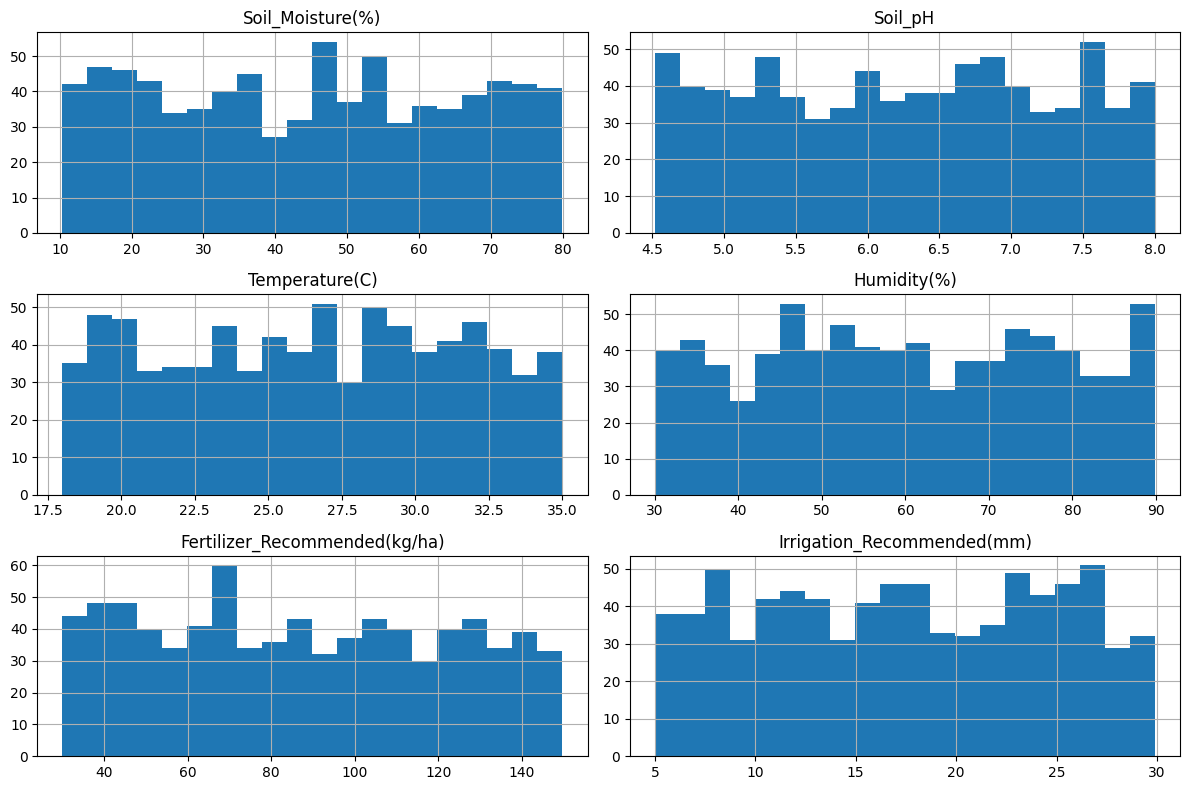

In [44]:
# Plotting histograms
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
                'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()



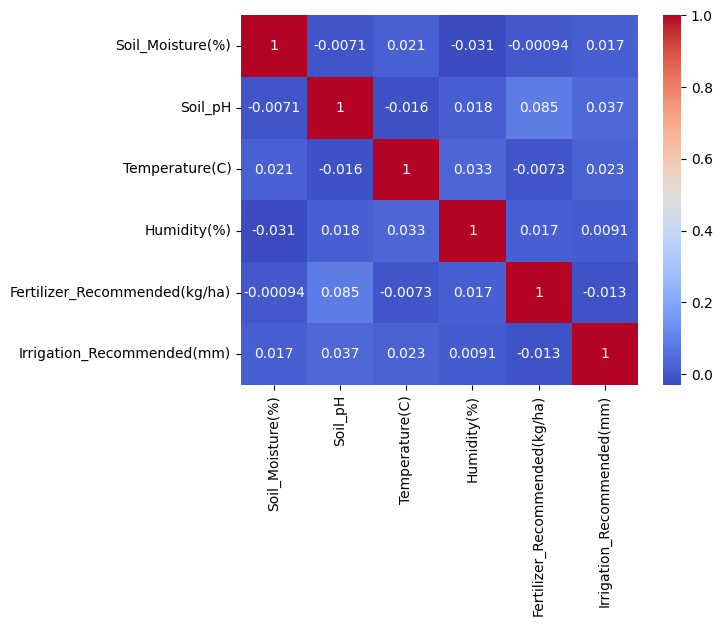

In [45]:

# Correlation heatmap
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

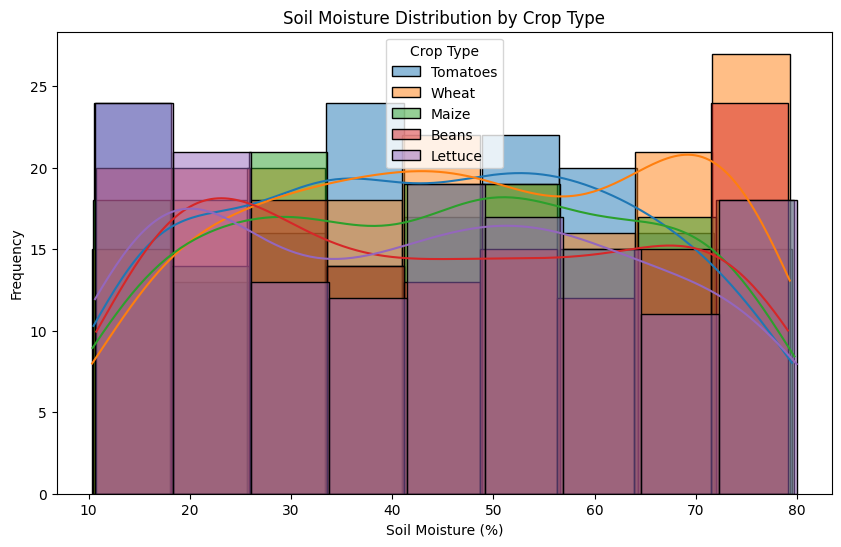

Wheat


In [46]:
plt.figure(figsize=(10, 6))
for crop in df['Crop_Type'].unique():
    sns.histplot(data=df[df['Crop_Type'] == crop], 
                 x='Soil_Moisture(%)', 
                 label=crop,
                 alpha=0.5,  # Makes overlapping  visible
                 kde=True)   # Adds smoothed distribution line
    
plt.title('Soil Moisture Distribution by Crop Type')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Frequency')
plt.legend(title='Crop Type')
plt.show()

# Crop with highest average Soil_Moisture
print(df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().idxmax())

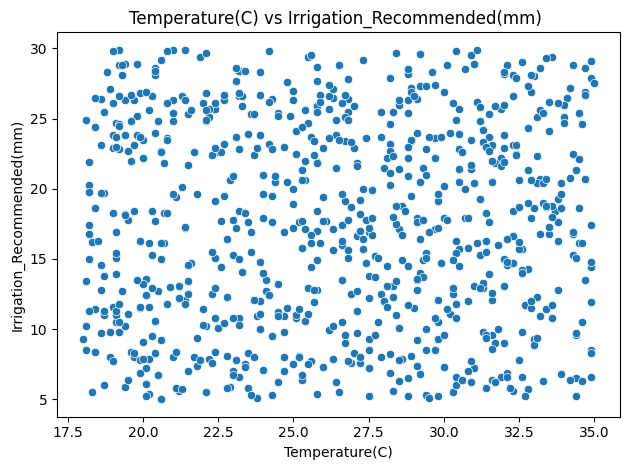

In [48]:
# Analysing irrigation recommended against temperature, to make recommendations
sns.scatterplot(x='Temperature(C)', y='Irrigation_Recommended(mm)', data=df)
plt.title("Temperature(C) vs Irrigation_Recommended(mm) ")
plt.tight_layout()
plt.show()

In [49]:
# Saving to new CSV
df.to_csv('cleaned_climate_action_data.csv', index=False)

In [ ]:
'''
Key Findings

1.	Dataset Overview:
The dataset contains 10 fields: Sensor_ID, Date, Soil_Moisture, Soil_pH, Temperature, Humidity, Crop_Type, Fertilizer_Recommended, Irrigation_Recommended, and Drone_Image_ID.
2.	Missing Values:
The Date and Crop_Type fields contain missing values. Since Crop_Type is essential, rows with null Crop_Type values are dropped. Date values, which are in ascending order, are imputed based on adjacent rows.
3.	Data Types:
All fields initially appear as type "object" in pandas due to mixed data types. Upon inspection, the expected types are:
o	Sensor_ID: String
o	Date: Date
o	Soil_Moisture, Soil_pH, Temperature, Humidity, Fertilizer_Recommended, Irrigation_Recommended: Numeric
o	Crop_Type, Drone_Image_ID: String
4.	Correlation Analysis:
A heatmap revealed that Soil_pH and Humidity are the most influential variables in determining Fertilizer_Recommended.
5.	Crop-Specific Analysis:
A boxplot was used to analyse soil moisture across crop types. Wheat was found to have the highest average soil moisture.
6.	Irrigation vs. Temperature:
A scatterplot of Irrigation_Recommended against Temperature shows no correlation—indicating that irrigation levels are not dependent on temperature.
7.	Data Readiness:
The dataset has been cleaned and pre-processed, with missing values handled. It is now ready for further analysis or modelling.

***********************************
Recommendations for Future Work

1.	Predictive Modelling:
Develop models to predict Fertilizer_Recommended and Irrigation_Recommended based on influential variables like Soil_pH, Humidity, and Soil_Moisture.
2.	Crop-Type Specific Optimization:
Analyse optimal soil and irrigation conditions per Crop_Type to recommend best practices for agricultural planning.
3.	Time Series Analysis:
Use the Date field to track changes over time and analyse seasonal trends in soil conditions and recommendations.
4.	Image Integration:
Leverage the Drone_Image_ID to incorporate image-based analysis (e.g., NDVI or crop health) using computer vision.
5.	Real-time Monitoring System:
Build a system that uses real-time sensor data to dynamically recommend fertilizer and irrigation levels.
6.	Data Validation:
Establish robust data validation pipelines to ensure quality and consistency, especially when scaling to larger datasets or real-time inputs.

'''

''